In [63]:
# Imporing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Importing data
data = pd.read_csv('cleaned_data.csv')
data

,Unnamed: 0,Purchase Order #,Vendor Name,MPN,PO DATE,IR Date,PO Quantity,IR Quantity,PO-IR,PO Status,No Of Days
0,0,PO10079852,"Google,Inc",CM8064401610101,2023-04-11,2023-04-11,20.0,20.0,0.0,Fully Billed,0.0
1,1,PO10079852,"Google,Inc",EX4300-48T-DC-CPO,2023-04-11,2023-04-11,10.0,10.0,0.0,Fully Billed,0.0
2,2,PO10079789,"Cal Pack Crating, Inc",Crate Charge,2023-04-09,2023-04-10,1.0,1.0,0.0,Fully Billed,1.0
3,3,PO10079795,"Google,Inc",2181230-6,2023-04-06,2023-04-11,1.0,1.0,0.0,Fully Billed,5.0
4,4,PO10079795,"Google,Inc",2328622-2,2023-04-06,2023-04-11,1.0,1.0,0.0,Fully Billed,5.0
...,...,...,...,...,...,...,...,...,...,...,...
39211,39211,PO10000307,PWB Solutions,SOL-EC002-GY .,2019-06-06,2019-08-28,18.0,18.0,0.0,Fully Billed,83.0
39212,39212,PO10000094,InterMetro Industries Corporation,IM-125-138-37280,2019-06-05,2019-07-01,30.0,30.0,0.0,Fully Billed,26.0
39213,39213,PO0010299,Global Equipment Company Inc.,24728C,2019-06-04,2019-07-12,21.0,21.0,0.0,Fully Billed,38.0
39214,39214,PO10000031,"ACME Construction Supply Co., Inc.",PT7406-4C,2019-06-04,2019-07-23,40.0,28.0,12.0,Fully Billed,49.0


In [16]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39216 entries, 0 to 39215
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Purchase Order #  39216 non-null  object 
 1   Vendor Name       39216 non-null  object 
 2   MPN               39216 non-null  object 
 3   PO DATE           39216 non-null  object 
 4   IR Date           39216 non-null  object 
 5   PO Quantity       39216 non-null  float64
 6   IR Quantity       39216 non-null  float64
 7   PO-IR             39216 non-null  float64
 8   PO Status         39216 non-null  object 
 9   No Of Days        39216 non-null  float64
dtypes: float64(4), object(6)
memory usage: 3.0+ MB


## Date Features
To enhance your dataset with time-based information:
Weekday vs. Weekend: Determine the day of the week from your date fields (PO DATE and IR Date) and create a binary feature indicating whether each date falls on a weekend.

Month or Quarter: Extract the month and quarter from your date fields to capture potential seasonal effects on lead times.

In [18]:
# Convert 'PO DATE' and 'IR Date' to datetime format
data['PO DATE'] = pd.to_datetime(data['PO DATE'])
data['IR Date'] = pd.to_datetime(data['IR Date'])

In [19]:
# Extract year, month, and day from both 'PO DATE' and 'IR Date'
data['PO DATE Year'] = data['PO DATE'].dt.year
data['PO DATE Month'] = data['PO DATE'].dt.month
data['PO DATE Day'] = data['PO DATE'].dt.day

data['IR Date Year'] = data['IR Date'].dt.year
data['IR Date Month'] = data['IR Date'].dt.month
data['IR Date Day'] = data['IR Date'].dt.day

# Drop the original 'PO DATE' and 'IR Date' columns to avoid the dtype issue
data = data.drop(columns=['PO DATE', 'IR Date'])

# Display the first few rows of the modified dataset
data.head()


,Purchase Order #,Vendor Name,MPN,PO Quantity,IR Quantity,PO-IR,PO Status,No Of Days,PO DATE Year,PO DATE Month,PO DATE Day,IR Date Year,IR Date Month,IR Date Day
0,PO10079852,"Google,Inc",CM8064401610101,20.0,20.0,0.0,Fully Billed,0.0,2023,4,11,2023,4,11
1,PO10079852,"Google,Inc",EX4300-48T-DC-CPO,10.0,10.0,0.0,Fully Billed,0.0,2023,4,11,2023,4,11
2,PO10079789,"Cal Pack Crating, Inc",Crate Charge,1.0,1.0,0.0,Fully Billed,1.0,2023,4,9,2023,4,10
3,PO10079795,"Google,Inc",2181230-6,1.0,1.0,0.0,Fully Billed,5.0,2023,4,6,2023,4,11
4,PO10079795,"Google,Inc",2328622-2,1.0,1.0,0.0,Fully Billed,5.0,2023,4,6,2023,4,11


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39216 entries, 0 to 39215
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Purchase Order #  39216 non-null  object 
 1   Vendor Name       39216 non-null  object 
 2   MPN               39216 non-null  object 
 3   PO Quantity       39216 non-null  float64
 4   IR Quantity       39216 non-null  float64
 5   PO-IR             39216 non-null  float64
 6   PO Status         39216 non-null  object 
 7   No Of Days        39216 non-null  float64
 8   PO DATE Year      39216 non-null  int64  
 9   PO DATE Month     39216 non-null  int64  
 10  PO DATE Day       39216 non-null  int64  
 11  IR Date Year      39216 non-null  int64  
 12  IR Date Month     39216 non-null  int64  
 13  IR Date Day       39216 non-null  int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 4.2+ MB


In [21]:
# Splitting the dataset into features (X) and target (y)
X = data.drop(['No Of Days'], axis=1)  # Features
y = data['No Of Days']  # Target variable

In [22]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Display the shape of the training and test sets to verify
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31372, 13), (7844, 13), (31372,), (7844,))

# Encodinng of the data

In [25]:
# Importing OHE and Targate encoder
from sklearn.preprocessing import OneHotEncoder

In [26]:
# Create the encoder instance
ohe = OneHotEncoder(sparse=False, drop='first')
# Fit on training data
X_train_ohe = ohe.fit_transform(X_train[['PO Status']])
# Transform on test data
X_test_ohe = ohe.transform(X_test[['PO Status']])

/Users/rahi_swapnil/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [27]:
from category_encoders import TargetEncoder

In [28]:
# Create the encoder instance
encoder = TargetEncoder()

In [29]:
# Fit on training data
X_train['MPN_encoded'] = encoder.fit_transform(X_train['MPN'], y_train)
# Transform on test data
X_test['MPN_encoded'] = encoder.transform(X_test['MPN'])

In [30]:
# Fit on training data
X_train['V_name_encoded'] = encoder.fit_transform(X_train['Vendor Name'], y_train)
# Transform on test data
X_test['V_name_encoded'] = encoder.transform(X_test['Vendor Name'])

In [31]:
# joining the OHE encoded columns

In [32]:
ohe_columns = ohe.get_feature_names_out(input_features=['PO Status'])
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=ohe_columns, index=X_train.index)
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=ohe_columns, index=X_test.index)

In [33]:
X_train = pd.concat([X_train, X_train_ohe_df], axis=1)
X_test = pd.concat([X_test, X_test_ohe_df], axis=1)

# Handling Outliers
We can do outliers handelling using winsorize and log transformation for the features, But we are using tree based algorithms and these are robust to outliers.

### Remove original categorical columns if they've been encoded to prevent duplicating information and potentially introducing multicollinearity.

In [35]:
X_train.drop(['Vendor Name','MPN','PO Status','Purchase Order #'], axis=1, inplace=True)
X_test.drop(['Vendor Name','MPN','PO Status','Purchase Order #'], axis=1, inplace=True)

In [37]:
X_train

,PO Quantity,IR Quantity,PO-IR,PO DATE Year,PO DATE Month,PO DATE Day,IR Date Year,IR Date Month,IR Date Day,MPN_encoded,V_name_encoded,PO Status_Fully Billed,PO Status_Partially Received,PO Status_Pending Bill,PO Status_Pending Billing/Partially Received
15988,5355.0,768.0,4587.0,2022,5,13,2022,11,3,102.894093,143.285636,0.0,1.0,0.0,0.0
17867,543.0,172.0,371.0,2022,4,23,2022,9,23,77.982487,143.285636,0.0,1.0,0.0,0.0
20832,207.0,120.0,87.0,2022,3,17,2022,5,18,54.655559,48.518760,1.0,0.0,0.0,0.0
34473,3.0,3.0,0.0,2021,7,7,2021,7,12,51.507509,31.807780,1.0,0.0,0.0,0.0
36957,1.0,1.0,0.0,2020,8,4,2020,8,6,26.462882,16.815249,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,1.0,1.0,0.0,2022,9,28,2023,1,4,59.977573,77.818792,0.0,1.0,0.0,0.0
11284,2.0,2.0,0.0,2022,7,15,2022,8,11,46.256395,77.818792,1.0,0.0,0.0,0.0
38158,102.0,8.0,94.0,2020,1,10,2020,6,10,89.428476,102.181395,1.0,0.0,0.0,0.0
860,1.0,1.0,0.0,2023,2,20,2023,3,2,33.047715,32.146739,1.0,0.0,0.0,0.0


## Random Forest Model

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

In [39]:
# Fit the model on the training data
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [40]:
# Predict on the test set
y_pred_rf = rf.predict(X_test)

In [41]:
# Evaluate the model
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
print(f"Random Forest RMSE: {rf_rmse}")

Random Forest RMSE: 14.538125364896473


## Hyperparameter Tuning

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'max_depth': [10, 20, None],  # Maximum number of levels in tree
}

In [44]:
# Initialize the Grid Search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

In [46]:
# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score (RMSE): {np.sqrt(-grid_search.best_score_)}")

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/Users/rahi_swapnil/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/rahi_swapnil/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/rahi_swapnil/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter a

/Users/rahi_swapnil/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/rahi_swapnil/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/rahi_swapnil/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter a

Best parameters: {'max_depth': None, 'max_features': 'auto', 'n_estimators': 300}
Best score (RMSE): 12.559064764634009


## Random forest after hyperparameter tuning

In [55]:
rf_tunned = RandomForestRegressor(random_state=42, max_depth=None, n_estimators=300, max_features= 'auto' )

In [56]:
# Fit the model on the training data
rf_tunned.fit(X_train, y_train)

/Users/rahi_swapnil/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_features='auto', n_estimators=300, random_state=42)

In [58]:
# Predict on the test set
y_pred_rf_tunned = rf_tunned.predict(X_test)

In [59]:
# Evaluate the model
rf_mse_tunned = mean_squared_error(y_test, y_pred_rf_tunned)
rf_rmse_tuned = np.sqrt(rf_mse_tunned)
print(f"Random Forest RMSE: {rf_rmse_tuned}")

Random Forest RMSE: 14.541124855248436


##  Gradient Boosting Machine (GBM) Model

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

In [48]:
# Initialize the Gradient Boosting Regressor model
gbm = GradientBoostingRegressor(random_state=42)

In [49]:
# Fit the model
gbm.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [50]:
# Predict and evaluate
y_pred_gbm = gbm.predict(X_test)
gbm_mse = mean_squared_error(y_test, y_pred_gbm)
gbm_rmse = np.sqrt(gbm_mse)
print(f"Gradient Boosting RMSE: {gbm_rmse}")

Gradient Boosting RMSE: 31.507132842554622


## Hyperparameter Tuning for GBM

In [51]:
param_grid_gbm = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 5, 7],
}

In [53]:
grid_search_gbm = GridSearchCV(estimator=gbm, param_grid=param_grid_gbm, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_gbm.fit(X_train, y_train)

print(f"Best parameters for GBM: {grid_search_gbm.best_params_}")
print(f"Best score (RMSE) for GBM: {np.sqrt(-grid_search_gbm.best_score_)}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters for GBM: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best score (RMSE) for GBM: 9.077861084183594


## GBM after hyperparameter tunning

In [60]:
# Initialize the Gradient Boosting Regressor model
gbm_tuned = GradientBoostingRegressor(random_state=42, learning_rate=0.1, max_depth=7, n_estimators=200)

In [61]:
# Fit the model
gbm_tuned.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=7, n_estimators=200, random_state=42)

In [62]:
# Predict and evaluate
y_pred_gbm_tunned = gbm_tuned.predict(X_test)
gbm_mse_tunned = mean_squared_error(y_test, y_pred_gbm_tunned)
gbm_rmse_tunned = np.sqrt(gbm_mse_tunned)
print(f"Gradient Boosting RMSE: {gbm_rmse_tunned}")

Gradient Boosting RMSE: 9.338659633656604


## Visual comparision

In [64]:
def plot_actual_vs_predicted(y_actual, y_predicted, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_actual, y_predicted, alpha=0.5)
    plt.title(f'Actual vs. Predicted Values - {model_name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'k--', lw=2)  # Diagonal line
    plt.show()

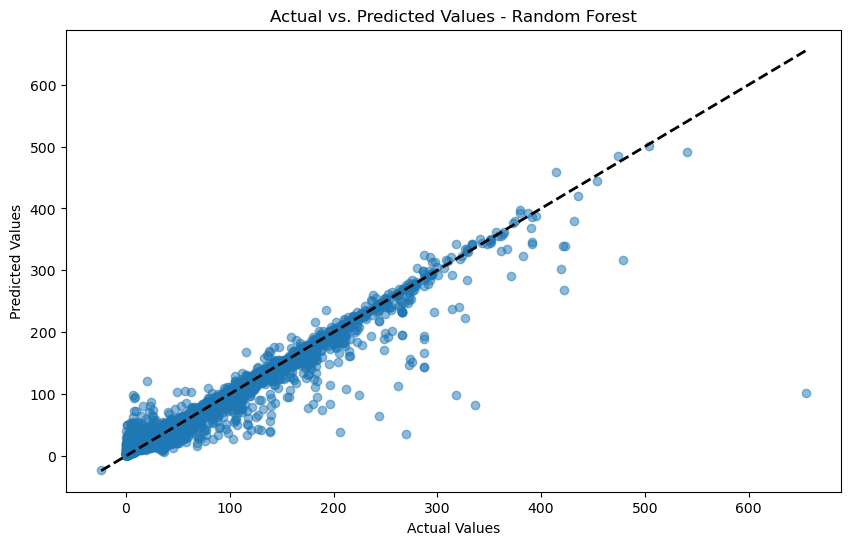

In [65]:
# Random Forest
plot_actual_vs_predicted(y_test, y_pred_rf, 'Random Forest')

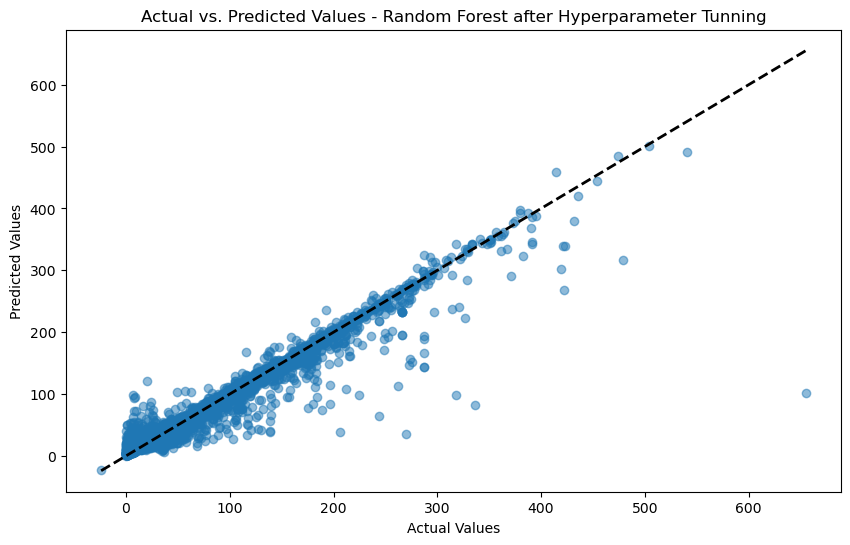

In [67]:
# Random forest after tunning parameters
plot_actual_vs_predicted(y_test, y_pred_rf_tunned, 'Random Forest after Hyperparameter Tunning')

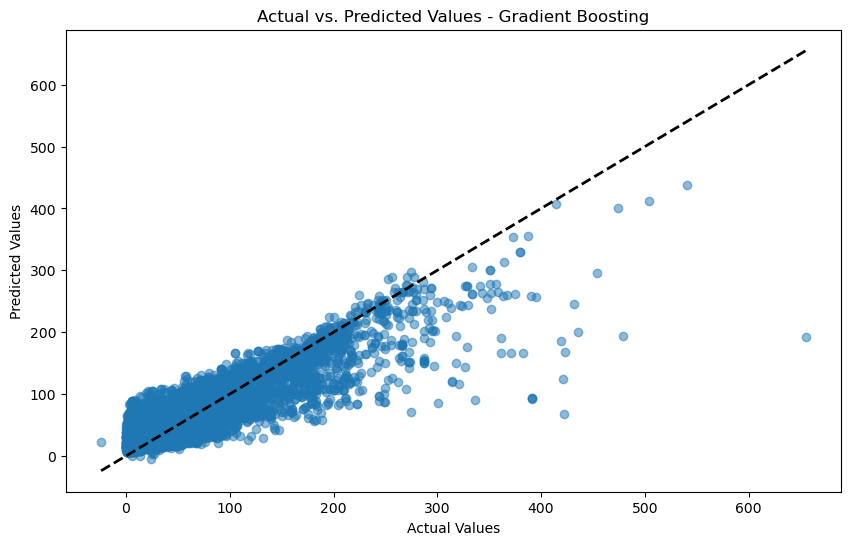

In [66]:
# Gradient Boosting
plot_actual_vs_predicted(y_test, y_pred_gbm, 'Gradient Boosting')

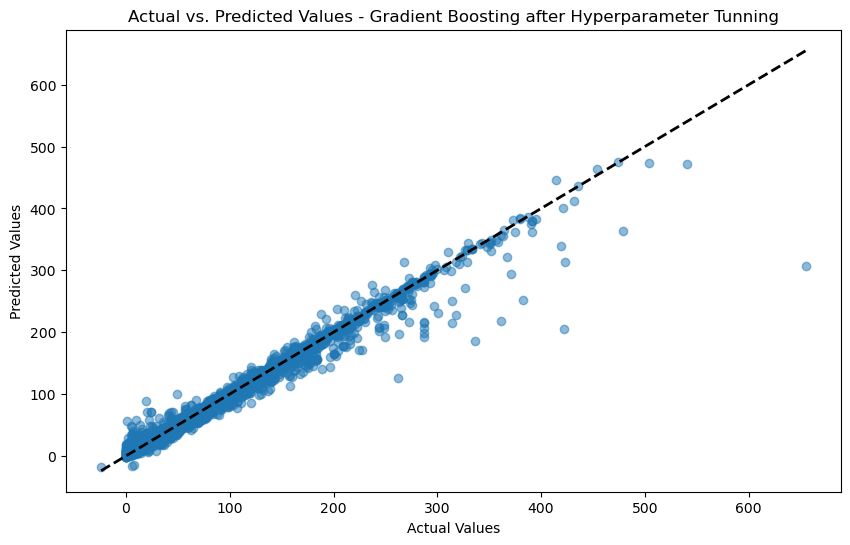

In [68]:
## Graident Boosting after Hyperparameter Tunning
plot_actual_vs_predicted(y_test, y_pred_gbm_tunned, 'Gradient Boosting after Hyperparameter Tunning')

## Quantitative Metrics

In [73]:
from sklearn.metrics import mean_absolute_error, r2_scorer

In [70]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest MAE: {mae_rf}")

mae_gbm = mean_absolute_error(y_test, y_pred_gbm)
print(f"Gradient Boosting MAE: {mae_gbm}")

Random Forest MAE: 5.779883987761346
Gradient Boosting MAE: 20.555779120061125


In [74]:
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest R-squared: {r2_rf}")

r2_gbm = r2_score(y_test, y_pred_gbm)
print(f"Gradient Boosting R-squared: {r2_gbm}")

Random Forest R-squared: 0.9527836157171035
Gradient Boosting R-squared: 0.7783261378165296


In [72]:
mae_rf_tunned = mean_absolute_error(y_test, y_pred_rf_tunned)
print(f"Random Forest Tunned MAE: {mae_rf_tunned}")

mae_gbm_tunned = mean_absolute_error(y_test, y_pred_gbm_tunned)
print(f"Gradient Boosting Tunned MAE: {mae_gbm_tunned}")

Random Forest Tunned MAE: 5.779883987761346
Gradient Boosting Tunned MAE: 4.179235317989932


In [75]:
r2_rf_tunned = r2_score(y_test, y_pred_rf_tunned)
print(f"Random Forest Tunnned R-squared: {r2_rf_tunned}")

r2_gbm_tunnned = r2_score(y_test, y_pred_gbm_tunned)
print(f"Gradient Boosting Tunned R-squared: {r2_gbm_tunnned}")


Random Forest Tunnned R-squared: 0.9527836157171035
Gradient Boosting Tunned R-squared: 0.9805255225280585


## Residual Analysis

In [76]:
def plot_residuals(y_actual, y_predicted, model_name):
    residuals = y_actual - y_predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_predicted, residuals, alpha=0.5)
    plt.title(f'Residuals vs. Predicted Values - {model_name}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='k', linestyle='--')
    plt.show()

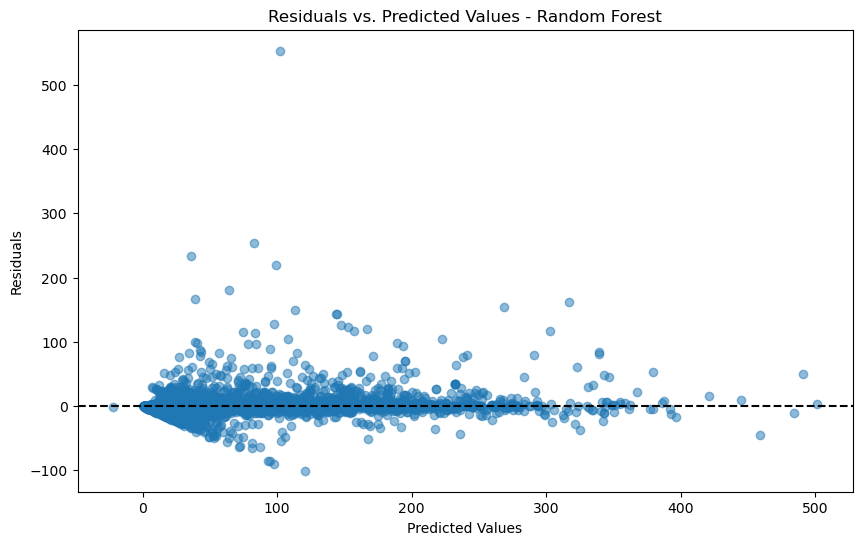

In [77]:
# Random Forest
plot_residuals(y_test, y_pred_rf, 'Random Forest')

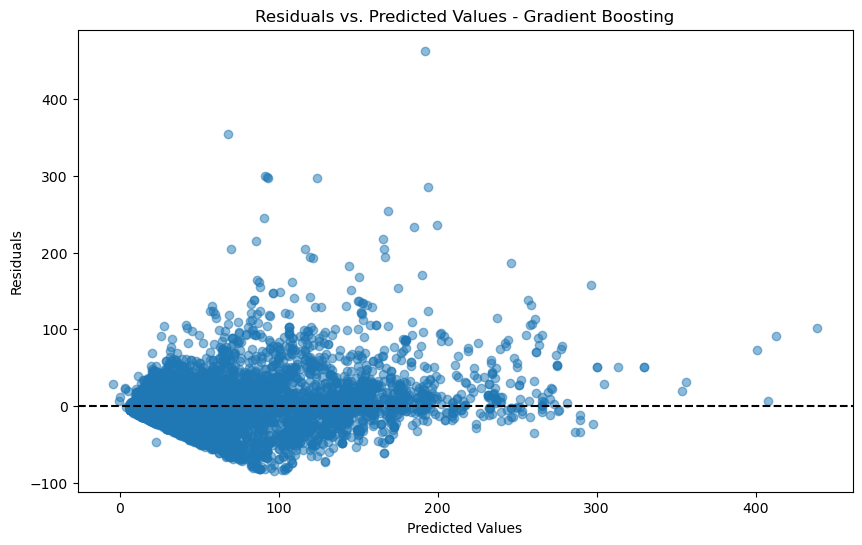

In [78]:
# Gradient Boosting
plot_residuals(y_test, y_pred_gbm, 'Gradient Boosting')

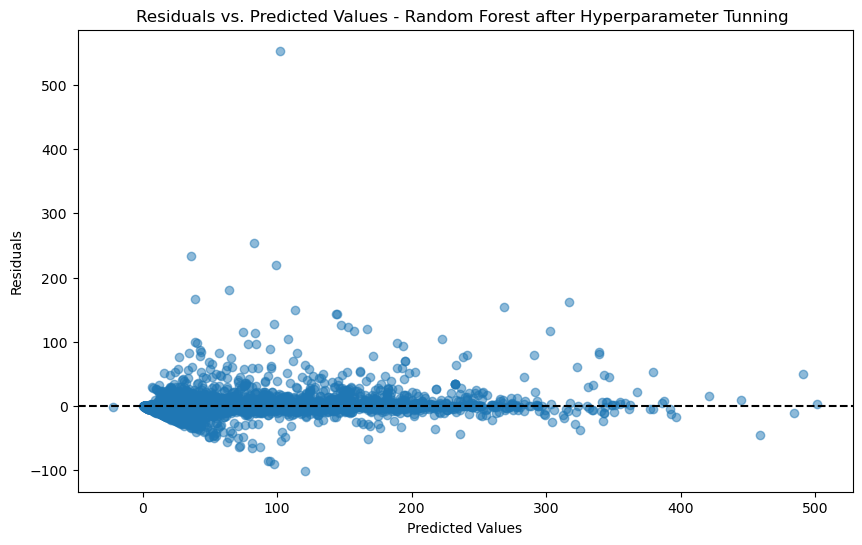

In [79]:
# Random Forest after Hyperparameter Tunning
plot_residuals(y_test, y_pred_rf_tunned, 'Random Forest after Hyperparameter Tunning ')

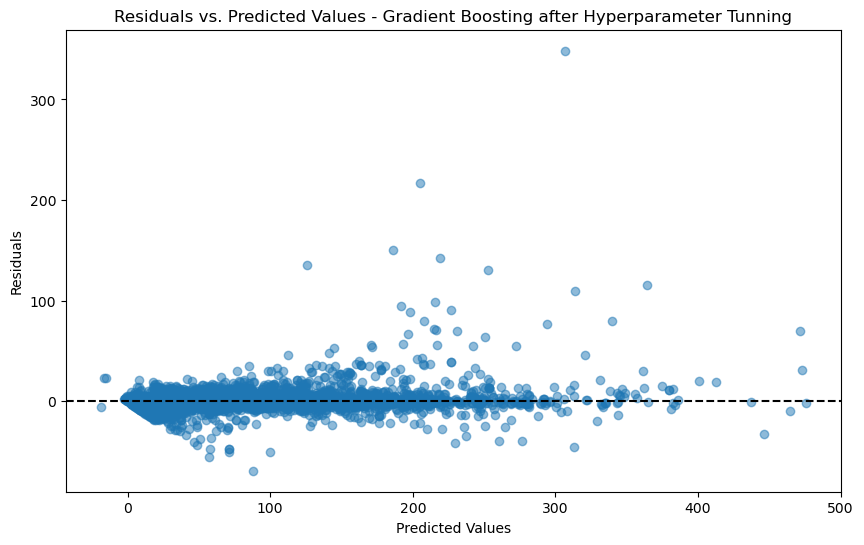

In [80]:
# Gradient Boosting after Hyperparameter Tunning
plot_residuals(y_test, y_pred_gbm_tunned, 'Gradient Boosting after Hyperparameter Tunning')

In [81]:
## Creating a dataframe to store all the metrices


# metrics for Random Forest
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

# metrics for Random Forest tunned
rf_rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_rf_tunned))
rf_mae_tunned = rf_mae = mean_absolute_error(y_test, y_pred_rf_tunned)
rf_r2_tunned = rf_r2 = r2_score(y_test, y_pred_rf_tunned)

# metrics for Gradient Boosting
gbm_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbm))
gbm_mae = mean_absolute_error(y_test, y_pred_gbm)
gbm_r2 = r2_score(y_test, y_pred_gbm)

# metrics for Gradient Boosting tunned
gbm_rmse_tunned = np.sqrt(mean_squared_error(y_test, y_pred_gbm_tunned))
gbm_mae_tunned = mean_absolute_error(y_test, y_pred_gbm_tunned)
gbm_r2_tunned = r2_score(y_test, y_pred_gbm_tunned)

In [82]:
# Create a DataFrame to display these metrics
metrics_df = pd.DataFrame({
    'Random Forest': [rf_rmse, rf_mae, rf_r2],
    'Gradient Boosting': [gbm_rmse, gbm_mae, gbm_r2],
    'Random Forest Tunned' : [rf_rmse_tuned, rf_mae_tunned, rf_r2_tunned],
    'Gradient Boosting Tunned': [gbm_rmse_tunned, gbm_mae_tunned, gbm_r2_tunned]
    
}, index=['RMSE', 'MAE', 'R-squared'])

metrics_df

,Random Forest,Gradient Boosting,Random Forest Tunned,Gradient Boosting Tunned
RMSE,14.541125,31.507133,14.541125,9.338660
MAE,5.779884,20.555779,5.779884,4.179235
R-squared,0.952784,0.778326,0.952784,0.980526


In [ ]:
''' ## Model Evaluation:
- Random Forest:

RMSE: 14.541125, 
MAE: 5.779884, 
R-squared: 0.952784

High R-squared, indicating good model performance, but the RMSE and MAE suggest there is room for improvement.
Gradient Boosting:

RMSE: 31.507133, 
MAE: 20.555779, 
R-squared: 0.778326

Lower performance across all metrics compared to Random Forest, indicating it may not predict as accurately.
Random Forest Tuned (identical scores to Random Forest, suggesting either a reporting error or no improvement from tuning):

RMSE: 14.541125, 
MAE: 5.779884, 
R-squared: 0.952784

Same as Random Forest, good R-squared but potentially improved by further tuning.


- Gradient Boosting Tuned:

RMSE: 9.338660, 
MAE: 4.179235, 
R-squared: 0.980526

Best scores across all metrics, indicating it is the most accurate and consistent model for predicting the dependent variable.
'''

## Conclusion:
The Gradient Boosting Tuned model is the best among the four according to the scores. It has the highest R-squared value, indicating it can explain a higher proportion of the variance in the dependent variable. Furthermore, it has the lowest RMSE and MAE values, suggesting its predictions are closer to the actual values with less error. This model combines the advantages of gradient boosting with effective tuning, achieving superior prediction accuracy and consistency.

In [83]:
# Saving the models
import joblib

In [84]:
# Random Forest model
model_filename = 'random_forest_model.pkl'
joblib.dump(rf, model_filename)

['random_forest_model.pkl']

In [85]:
# Random Forest tunned model
model_filename = 'random_forest_tunned_model.pkl'
joblib.dump(rf_tunned, model_filename)

['random_forest_tunned_model.pkl']

In [86]:
# GBM model
model_filename = 'GBM_model.pkl'
joblib.dump(gbm, model_filename)

['GBM_model.pkl']

In [87]:
# GBM tunned model
model_filename = 'GBM_tunnned_model.pkl'
joblib.dump(gbm_tuned, model_filename)

['GBM_tunnned_model.pkl']